In [61]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline

# 设置字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为

In [62]:
file_path = './data/指标/附件1_1990-2023年各地区医疗卫生机构数(个).xlsx'
df = pd.read_excel(file_path)

df.head()

,年份,中国,北京市,天津市,河北省,山西省,内蒙古,辽宁省,吉林省,黑龙江,...,重庆市,四川省,贵州省,云南省,西藏,陕西省,甘肃省,青海省,宁夏,新疆
0,1990,1012690.0,4953,3392,10586,6108,5161,7863,4407,8945,...,--,15056,6949,6671,1110,6416,4132,1218,1163,3945
1,1991,1003769.0,4970,3397,10647,6121,5172,7736,4369,8878,...,--,15077,6908,6708,1197,6433,4178,1184,1129,3937
2,1992,1001310.0,4868,3287,10715,5935,5253,7921,4189,8853,...,--,15005,4734,6765,1223,6404,4192,1187,1120,3985
3,1993,1000531.0,4962,3182,10958,6085,4932,7132,4006,7702,...,--,14255,3908,6469,1068,6215,4141,1172,1037,3894
4,1994,1005271.0,4958,3182,10274,5996,4918,6849,3920,7714,...,--,14217,3930,6474,1152,6227,4134,1177,1037,3907


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年份      34 non-null     int64  
 1   中国      34 non-null     float64
 2   北京市     34 non-null     int64  
 3   天津市     34 non-null     object 
 4   河北省     34 non-null     int64  
 5   山西省     34 non-null     object 
 6   内蒙古     34 non-null     object 
 7   辽宁省     34 non-null     object 
 8   吉林省     34 non-null     object 
 9   黑龙江     34 non-null     object 
 10  上海市     34 non-null     object 
 11  江苏省     34 non-null     object 
 12  浙江省     34 non-null     object 
 13  安徽省     34 non-null     int64  
 14  福建省     34 non-null     float64
 15  江西省     34 non-null     int64  
 16  山东省     34 non-null     float64
 17  河南省     34 non-null     int64  
 18  湖北省     34 non-null     float64
 19  湖南省     34 non-null     object 
 20  广东省     34 non-null     float64
 21  广西      34 non-null     int64  
 22  海南省 

In [64]:
# 数据预处理
# 将--转化成Nan
df.replace('--', np.nan, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)

# 查看有缺失值的省份及缺失个数
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

天津市    2
山西省    1
内蒙古    1
辽宁省    2
吉林省    2
黑龙江    1
上海市    2
江苏省    1
浙江省    2
湖南省    2
海南省    2
重庆市    6
西藏     2
陕西省    2
dtype: int64


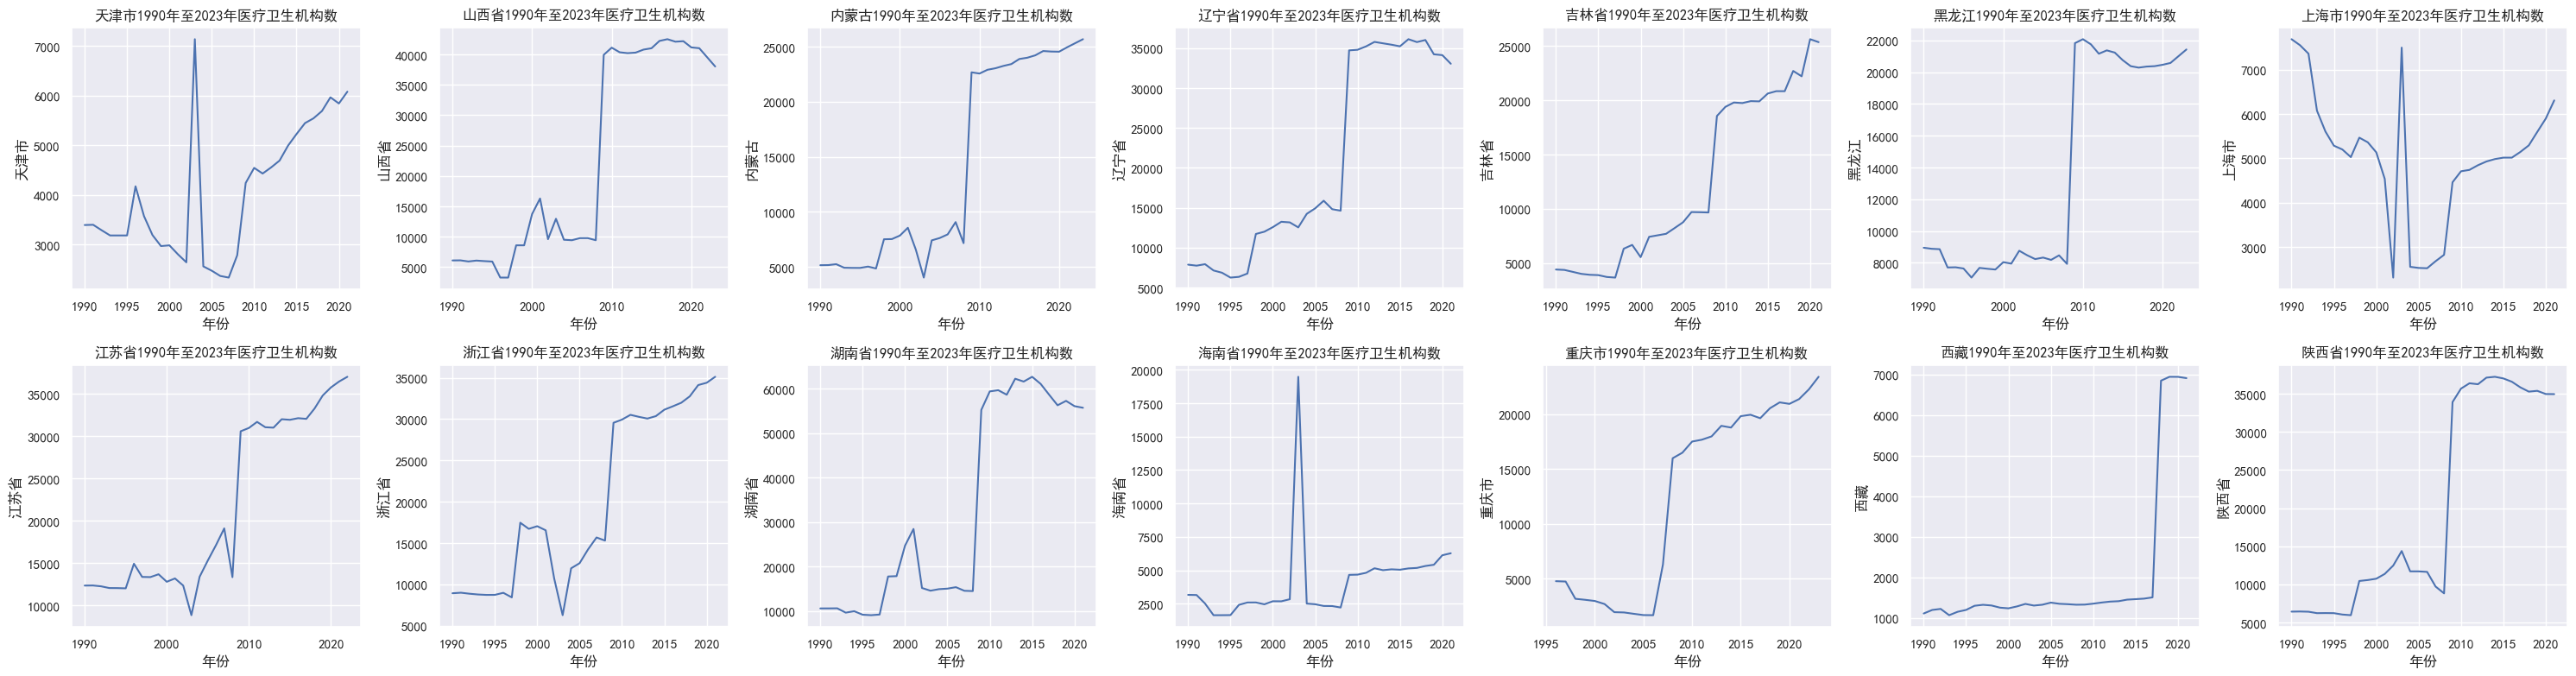

In [65]:
# 观察数据趋势
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 8))

axes = axes.flatten()
for i, city in enumerate(missing_values.index):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
    sns.lineplot(data=df, x='年份', y=city, ax=axes[i])
    axes[i].set_title(f'{city}1990年至2023年医疗卫生机构数')

plt.tight_layout()
plt.show()

In [66]:
# FIXME: 效果欠佳
'''
# 采用三次样条插值填充缺失值

# 遍历每个有缺失值的省份
for col in missing_values.index:
    # 获取非缺失值的数据点
    valid_idx = df['年份'][df[col].notna()]
    valid_values = df[col][df[col].notna()]

    # 创建三次样条插值模型
    cs = CubicSpline(valid_idx, valid_values)

    # 填充缺失值
    df[col] = pd.Series(cs(df['年份']), index=df.index)

# 检查是否填充成功
print(df.isna().sum())       
'''

"\n# 采用三次样条插值填充缺失值\n\n# 遍历每个有缺失值的省份\nfor col in missing_values.index:\n    # 获取非缺失值的数据点\n    valid_idx = df['年份'][df[col].notna()]\n    valid_values = df[col][df[col].notna()]\n\n    # 创建三次样条插值模型\n    cs = CubicSpline(valid_idx, valid_values)\n\n    # 填充缺失值\n    df[col] = pd.Series(cs(df['年份']), index=df.index)\n\n# 检查是否填充成功\nprint(df.isna().sum())       \n"

In [67]:
# 将数据类型推断为更明确的类型
df = df.infer_objects()

# 使用线性插值填充缺失值
interpolated_df = df.interpolate(method='linear', limit_direction='both')

# 检查插值后的数据
print(interpolated_df.isna().sum())

年份     0
中国     0
北京市    0
天津市    0
河北省    0
山西省    0
内蒙古    0
辽宁省    0
吉林省    0
黑龙江    0
上海市    0
江苏省    0
浙江省    0
安徽省    0
福建省    0
江西省    0
山东省    0
河南省    0
湖北省    0
湖南省    0
广东省    0
广西     0
海南省    0
重庆市    0
四川省    0
贵州省    0
云南省    0
西藏     0
陕西省    0
甘肃省    0
青海省    0
宁夏     0
新疆     0
dtype: int64


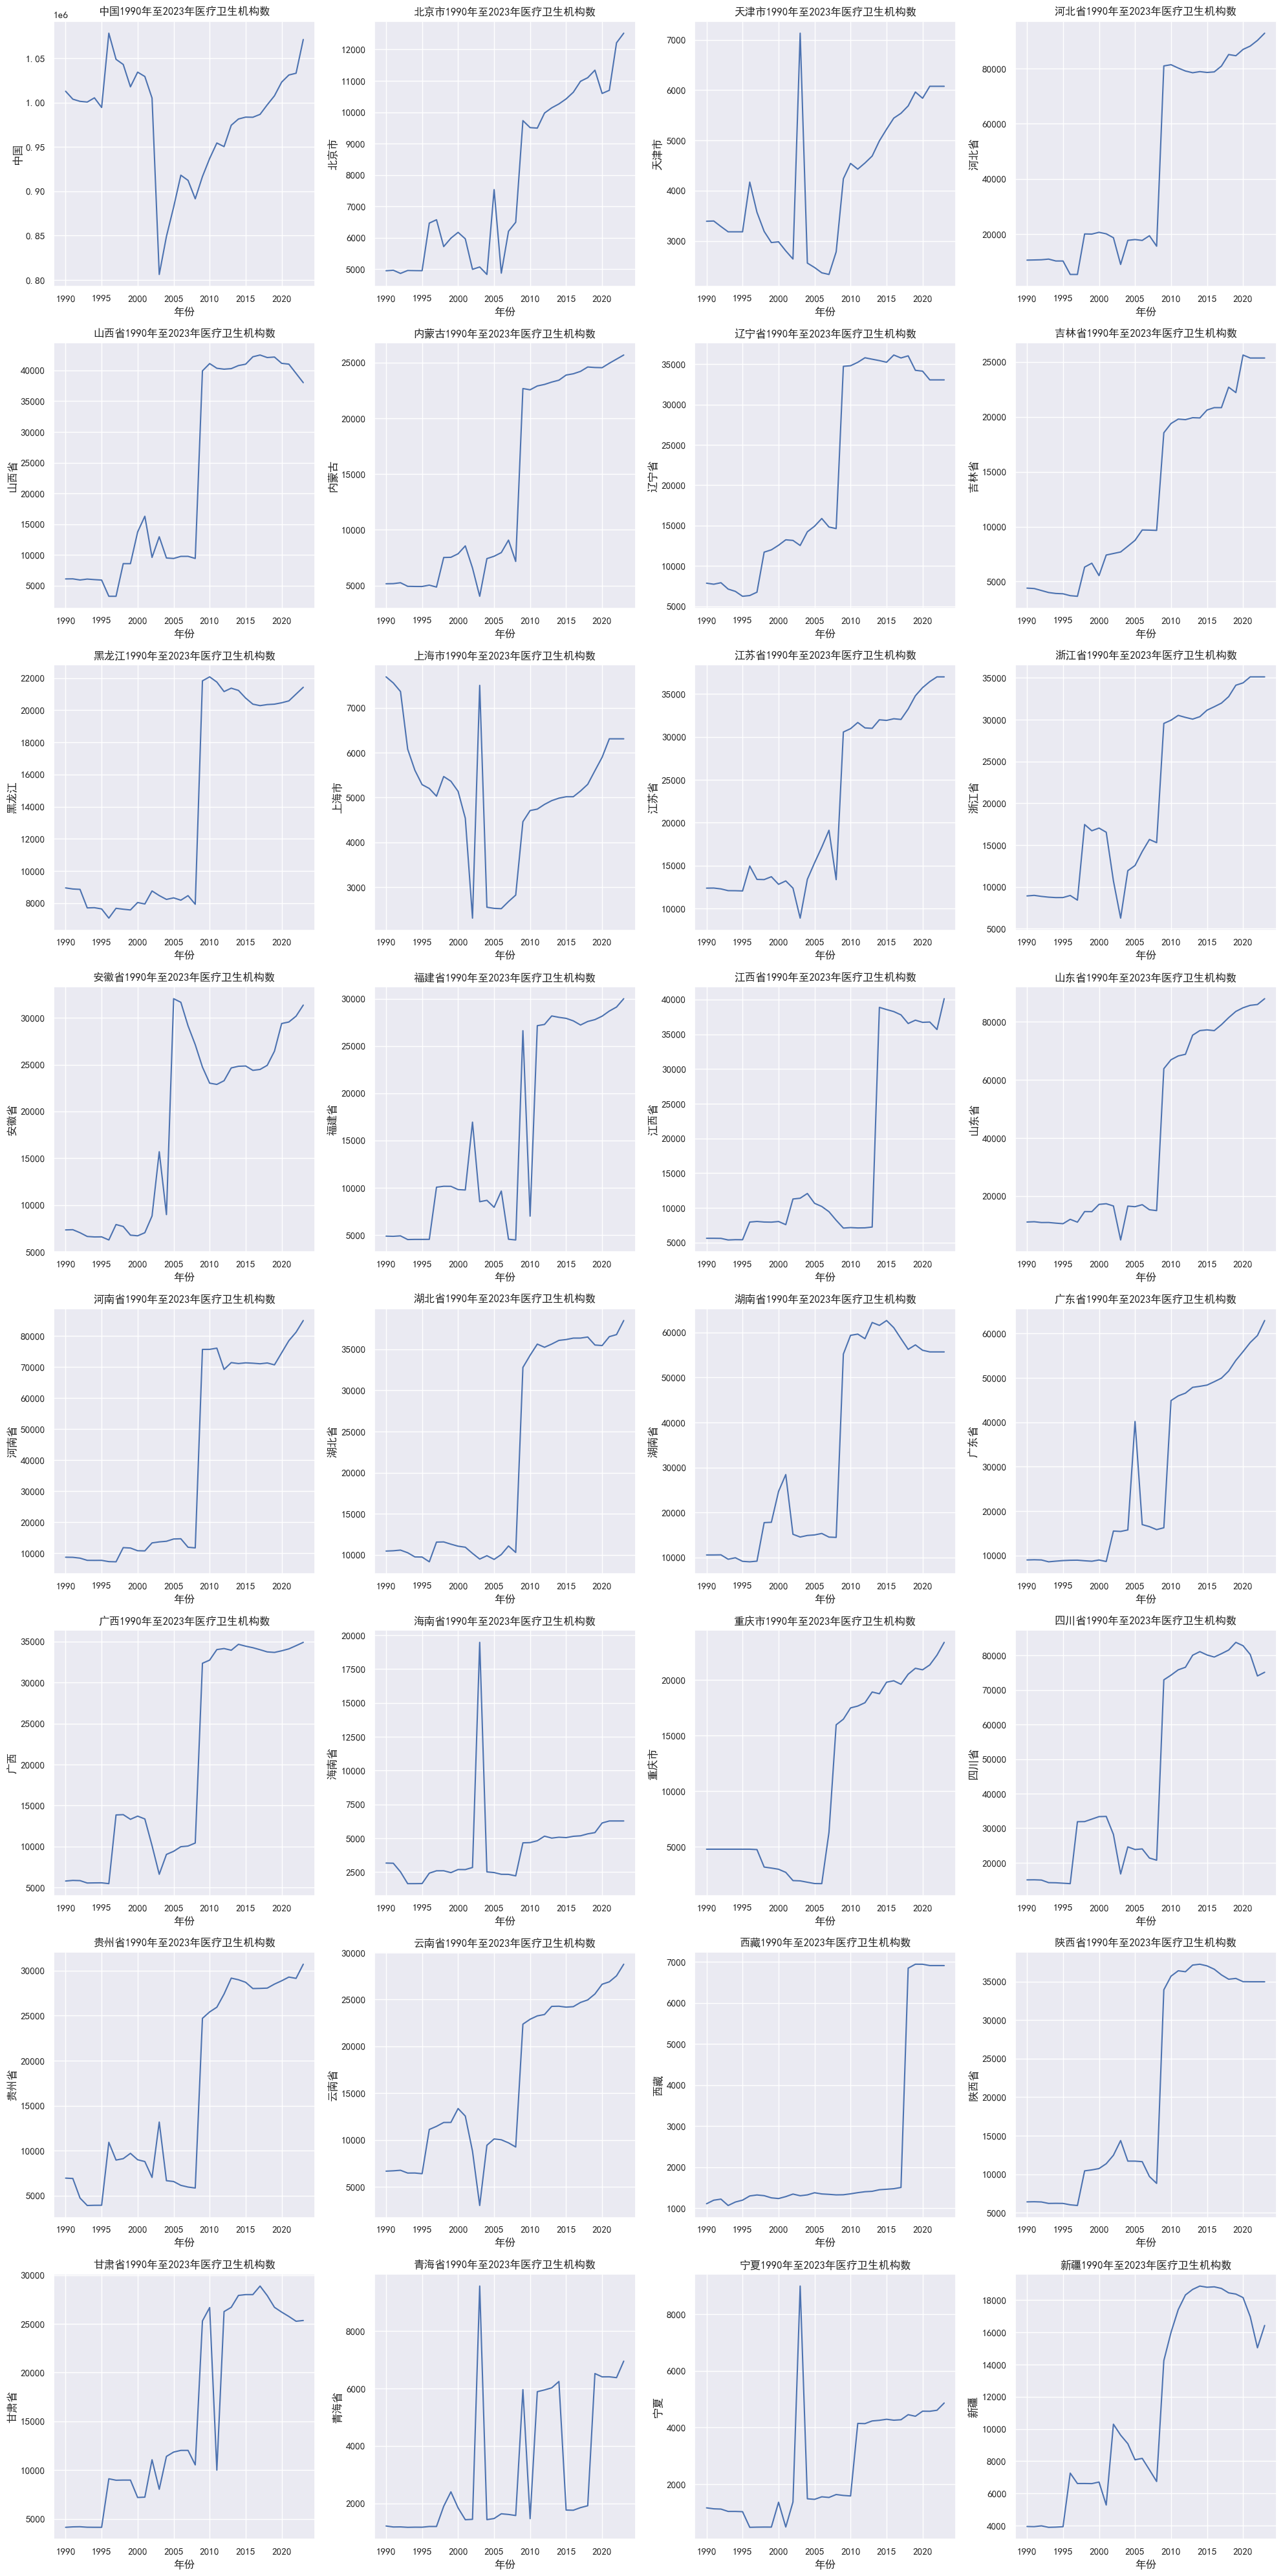

In [68]:
# 观察数据趋势，比较不同地区医疗机构的数量变化情况
cities = df.columns[1:]
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))

axes = axes.flatten()
for i, city in enumerate(cities):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
    sns.lineplot(data=interpolated_df, x='年份', y=city, ax=axes[i])
    axes[i].set_title(f'{city}1990年至2023年医疗卫生机构数')

plt.tight_layout()
plt.show()

In [69]:
# 年均增长率函数（CAGR）
def calculate_cagr(start, end, periods):
    return (end / start) ** (1 / periods) - 1

In [70]:
# 计算各地区的年均增长率
regions = df.columns[1:]  # 排除年份列
growth_rates = {}

for region in regions:
    start_value = interpolated_df[region].iloc[0]
    end_value = interpolated_df[region].iloc[-1]
    periods = interpolated_df['年份'].iloc[-1] - interpolated_df['年份'].iloc[0]
    growth_rate = calculate_cagr(start_value, end_value, periods)
    growth_rates[region] = growth_rate * 100

print(growth_rates)

{'中国': 0.169788325158704, '北京市': 2.8494606972709446, '天津市': 1.7821389634359086, '河北省': 6.800609049362749, '山西省': 5.695648596938052, '内蒙古': 4.983142130751572, '辽宁省': 4.4472135755802, '吉林省': 5.444075917863245, '黑龙江': 2.6822002911671694, '上海市': -0.59851118069012, '江苏省': 3.376961779864973, '浙江省': 4.241457968558793, '安徽省': 4.500678077433706, '福建省': 5.6541514213513056, '江西省': 6.130287758415864, '山东省': 6.492394884849251, '河南省': 7.161601845282162, '湖北省': 4.0232731504925345, '湖南省': 5.1693337211666135, '广东省': 6.072845695859774, '广西': 5.594196425733267, '海南省': 2.094689696675056, '重庆市': 4.931224225336717, '四川省': 4.990736199399448, '贵州省': 4.607164330355085, '云南省': 4.527972939756464, '西藏': 5.696252673037772, '陕西省': 5.272873051973748, '甘肃省': 5.650283347999729, '青海省': 5.418643846098092, '宁夏': 4.430658573333823, '新疆': 4.417446432051464}


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3484\901208857.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="年均增长率", y="地区", data=growth_rate_df_cities, palette="viridis")


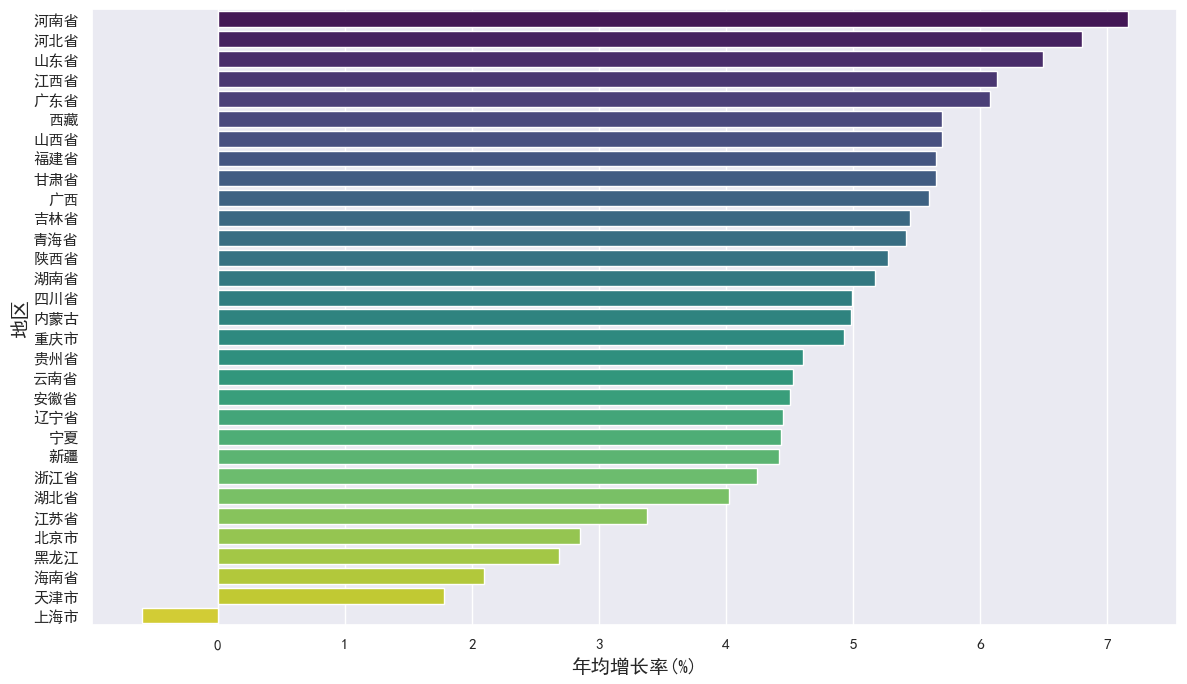

In [71]:
# 将增长率字典封装成dataframe
growth_rate_df = pd.DataFrame(list(growth_rates.items()), columns=["地区", "年均增长率"])
growth_rate_df_cities = growth_rate_df.drop(index=0) # 删除全国数据
growth_rate_df_cities.sort_values(by="年均增长率", ascending=False, inplace=True)

# 绘制柱状图比较各地区的年均增长率
sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
sns.barplot(x="年均增长率", y="地区", data=growth_rate_df_cities, palette="viridis")
plt.xlabel("年均增长率(%)", fontsize=14)
plt.ylabel("地区", fontsize=14)
plt.show()

In [72]:
interpolated_df.to_csv('interpolated_data_med_dep.csv', index=False, encoding='utf-8')